In [49]:
import io
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier       
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

In [2]:
uploaded = files.upload()

Saving DS2_C5_S7_AllRent_Data_Challenge.csv to DS2_C5_S7_AllRent_Data_Challenge.csv


In [55]:
df = pd.read_csv(io.BytesIO(uploaded['DS2_C5_S7_AllRent_Data_Challenge.csv']))
df

,Unnamed: 0,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
0,105408,1.0,0,0f9d07991ba14c82d3d368b72d90270a,04-04-2016 03:34,Gorgeous unit in one of the most genuinely cov...,230 Central Park South,"['Cats Allowed', 'Dogs Allowed', 'Doorman', 'E...",40.7672,6827153,-73.9802,932589de9230b697808216774fa26bd4,['https://photos.renthop.com/2/6821519_0a14cc2...,2800,230 Central Park South,high
1,110219,1.0,1,564d6f608f41e8d4a5e181c4e068e3d9,21-04-2016 20:40,Enormous 1 bedroom apartment in Murray Hill. F...,E 39th St,"['Cats Allowed', 'Dogs Allowed', 'Reduced Fee'...",40.7483,6908998,-73.9741,489ad933197469ae66acd1f7ce18f908,['https://photos.renthop.com/2/6908998_6b00895...,2100,243 E 39th St,high
2,56113,1.0,1,69790fbf0bf7e22b1d0ebc721cf0f633,14-05-2016 05:44,"This 1 bedroom, 1 bathroom spacious apartment ...",E 25th St.,"['Elevator', 'Furnished', 'Hardwood Floors']",40.7399,7013774,-73.9812,792c0f1ad1431397c65db3e69b770928,['https://photos.renthop.com/2/7013774_e7ead5d...,3000,217 E 25th St.,high
3,37765,1.0,2,d0234abbc01a982d54e8d446acc03405,05-06-2016 03:37,SPECTACULAR2 BEDROOM APARTMENT IN LUXURY 24HR ...,West 34th Street,"['Doorman', 'Elevator', 'Dishwasher', 'Hardwoo...",40.7530,7113518,-73.9958,eb5a6c4c2eb6f3e2a085c477afd5a815,['https://photos.renthop.com/2/7113518_d234153...,3000,360 West 34th Street,high
4,67397,1.0,2,a36895b9975c6991ca0fa1d9a99023a1,26-05-2016 05:36,NO FEE.. Newly Reno XL Convertible 2 Br .. Pri...,East 72nd Street,"['Dining Room', 'Doorman', 'Elevator', 'Fitnes...",40.7695,7071666,-73.9603,0a6ba20b892ed61df751420934d1ab51,['https://photos.renthop.com/2/7071666_4f81618...,3300,200 East 72nd Street,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,100591,1.0,0,cd6e0616a89b2687b8d7b80a1e982ac2,08-04-2016 05:59,58TH! LARGE SPACIOUS STUDIO W/ SEPARATE KITCHE...,East 58th Street,"['Pre-War', 'Dishwasher', 'Hardwood Floors', '...",40.7590,6844961,-73.9621,fc6e39fa6d54cfbc0109950411df29ca,['https://photos.renthop.com/2/6844961_5b045ca...,2000,401 East 58th Street,medium
9867,86449,1.0,2,27e0ae0427a5150191c73831eb901ab0,13-04-2016 15:40,Beautiful Renovated Large True 2 bedrrom apart...,EAST 11 TH ST,"['Cats Allowed', 'Private Outdoor Space', 'Dog...",40.7187,6868922,-73.9919,3e0c28a1f4b9c11b809ff21dbb920b5c,['https://photos.renthop.com/2/6868922_d14a762...,3590,EAST 11 TH ST,medium
9868,44736,1.0,1,d843d07dfbd498625ffd8d9e6078745e,12-05-2016 05:41,Great Deal that won't last!Become a lucky resi...,Amsterdam Avenue,"['Elevator', 'Furnished', 'Laundry in Unit', '...",40.8002,7002179,-73.9656,4c168ba2cf07ab943c98cada6160d2d1,['https://photos.renthop.com/2/7002179_2c2510f...,3000,933 Amsterdam Avenue,medium
9869,100906,1.0,0,b401b080b557697e91b2d19b5a22fac9,21-04-2016 04:56,Stunning West Village apartment available for ...,W 13 Street,"['Elevator', 'Loft', 'Hardwood Floors', 'Dogs ...",40.7383,6906479,-74.0006,4414b04ea8115e64639b64b73737036a,['https://photos.renthop.com/2/6906479_a898cc6...,2525,205 W 13 Street,medium


In [56]:
df.shape

(9871, 16)

In [57]:
df.isnull().sum()

Unnamed: 0           0
bathrooms            0
bedrooms             0
building_id          0
created              0
description        286
display_address     34
features             0
latitude             0
listing_id           0
longitude            0
manager_id           0
photos               0
price                0
street_address       5
interest_level       0
dtype: int64

In [58]:
for i in df.columns:
  if df[i].dtype == 'object':
    df[i].fillna((df[i].mode()[0]), inplace = True)
  if df[i].dtype != 'object':
    df[i].fillna((df[i].mean()), inplace = True)

In [59]:
df.isnull().sum()

Unnamed: 0         0
bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
dtype: int64

In [60]:
df.dtypes

Unnamed: 0           int64
bathrooms          float64
bedrooms             int64
building_id         object
created             object
description         object
display_address     object
features            object
latitude           float64
listing_id           int64
longitude          float64
manager_id          object
photos              object
price                int64
street_address      object
interest_level      object
dtype: object

In [61]:
df.describe()

,Unnamed: 0,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,9871.000000,9871.000000,9871.000000,9871.000000,9.871000e+03,9871.000000,9871.000000
mean,61828.973154,1.210617,1.533685,40.747167,7.024062e+06,-73.965549,3662.860804
std,35901.607107,0.501985,1.106696,0.414548,1.269108e+05,0.760686,2559.911997
min,9.000000,0.000000,0.000000,0.000000,6.812005e+06,-87.613400,43.000000
25%,30968.000000,1.000000,1.000000,40.727500,6.914494e+06,-73.992200,2499.000000
50%,61354.000000,1.000000,1.000000,40.750600,7.022816e+06,-73.978300,3125.000000
75%,93229.500000,1.000000,2.000000,40.773900,7.130978e+06,-73.955100,4047.500000
max,123995.000000,10.000000,8.000000,43.034600,7.742631e+06,0.000000,90000.000000


In [62]:
df.corr()

,Unnamed: 0,bathrooms,bedrooms,latitude,listing_id,longitude,price
Unnamed: 0,1.000000,-0.007826,-0.024353,-0.008849,-0.855608,0.005866,-0.010804
bathrooms,-0.007826,1.000000,0.528971,0.007422,0.000749,-0.000629,0.617426
bedrooms,-0.024353,0.528971,1.000000,0.015035,0.021417,-0.008100,0.431208
latitude,-0.008849,0.007422,0.015035,1.000000,0.012773,-0.967374,0.005881
listing_id,-0.855608,0.000749,0.021417,0.012773,1.000000,-0.008984,-0.000628
longitude,0.005866,-0.000629,-0.008100,-0.967374,-0.008984,1.000000,-0.009305
price,-0.010804,0.617426,0.431208,0.005881,-0.000628,-0.009305,1.000000


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [64]:
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = LabelEncoder().fit_transform(df[i])

In [65]:
df

,Unnamed: 0,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
0,105408,1.0,0,194,699,3731,427,169,40.7672,6827153,-73.9802,1216,210,2800,1946,0
1,110219,1.0,1,1078,5541,3297,1451,320,40.7483,6908998,-73.9741,615,2227,2100,2157,0
2,56113,1.0,1,1335,3749,7120,1387,1599,40.7399,7013774,-73.9812,996,4469,3000,1716,0
3,37765,1.0,2,2673,1197,6314,3066,959,40.7530,7113518,-73.9958,1917,6566,3000,3450,0
4,67397,1.0,2,2091,6943,5437,1866,656,40.7695,7071666,-73.9603,80,5699,3300,1423,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,100591,1.0,0,2641,1881,1305,1844,2322,40.7590,6844961,-73.9621,2045,780,2000,3643,2
9867,86449,1.0,2,502,3421,2347,1732,365,40.7187,6868922,-73.9919,527,1328,3590,5442,2
9868,44736,1.0,1,2787,3108,3795,1084,1603,40.8002,7002179,-73.9656,634,4245,3000,5292,2
9869,100906,1.0,0,2325,5489,6703,2554,1690,40.7383,6906479,-74.0006,577,2161,2525,1528,2


In [66]:
df=df.drop(columns=['Unnamed: 0'])
df

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
0,1.0,0,194,699,3731,427,169,40.7672,6827153,-73.9802,1216,210,2800,1946,0
1,1.0,1,1078,5541,3297,1451,320,40.7483,6908998,-73.9741,615,2227,2100,2157,0
2,1.0,1,1335,3749,7120,1387,1599,40.7399,7013774,-73.9812,996,4469,3000,1716,0
3,1.0,2,2673,1197,6314,3066,959,40.7530,7113518,-73.9958,1917,6566,3000,3450,0
4,1.0,2,2091,6943,5437,1866,656,40.7695,7071666,-73.9603,80,5699,3300,1423,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,1.0,0,2641,1881,1305,1844,2322,40.7590,6844961,-73.9621,2045,780,2000,3643,2
9867,1.0,2,502,3421,2347,1732,365,40.7187,6868922,-73.9919,527,1328,3590,5442,2
9868,1.0,1,2787,3108,3795,1084,1603,40.8002,7002179,-73.9656,634,4245,3000,5292,2
9869,1.0,0,2325,5489,6703,2554,1690,40.7383,6906479,-74.0006,577,2161,2525,1528,2


In [67]:
x = df[['bathrooms','bedrooms','created','price','manager_id']]
y = df['interest_level']

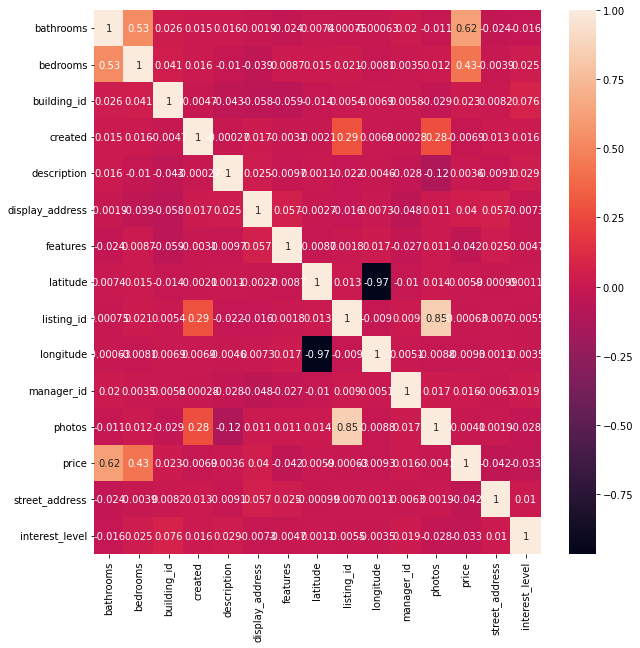

In [68]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot = True)

In [69]:
# task 5

results, names = [], []

In [70]:
model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=42)
n_score = cross_val_score(model, x ,y, scoring = 'f1_weighted', cv=cv, n_jobs= -1)
results.append(n_score)
names.append('CART')
print('f1 = ', np.mean(n_score))

f1 =  0.5949343439187514


In [71]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,train_size = 0.7,random_state=1)

In [72]:
f = model.fit(xtrain,ytrain)
f

DecisionTreeClassifier()

In [73]:
f.score(xtrain,ytrain)

0.9997105225068751

In [77]:
# task 6

def get_stacking():
    level0 = []
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [78]:
model = get_stacking()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x, y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
results.append(n_scores)
names.append('stacking')
np.mean(n_scores)

0.599969694771016

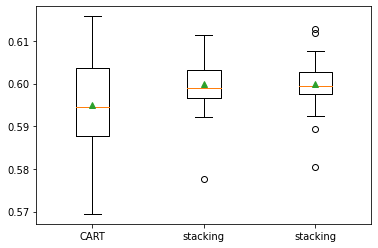

In [80]:
plt.boxplot(results, labels=names, showmeans=True);